In [65]:
import json
import pandas as pd

# Load JSON files
with open('/content/historical.json', 'r') as hist_file:
    historical_data = json.load(hist_file)

with open('/content/current_submission.json', 'r') as curr_sub_file:
    current_submission = json.load(curr_sub_file)

with open('/content/current_quiz.json', 'r') as curr_quiz_file:
    current_quiz = json.load(curr_quiz_file)

# Step 1: Process Historical Data
historical_df = pd.json_normalize(historical_data,max_level=1)

# Step 4: Combine Historical and Current Performance
performance_data = [
    {
        "quiz_id": historical_data[i]["quiz_id"],
        "topic": historical_data[i]["quiz"]["topic"],
        "accuracy": float(historical_data[i]["accuracy"].strip('%')),
        "score": historical_data[i]["score"]
    } for i in range(len(historical_data))
]

performance_data.append({
    "quiz_id": current_submission["quiz_id"],
    "topic": current_quiz["quiz"]["topic"],
    "accuracy": float(current_submission["accuracy"].strip('%')),
    "score": current_submission["score"]
})

performance_df = pd.DataFrame(performance_data)

performance_df

,quiz_id,topic,accuracy,score
0,51,Body Fluids and Circulation,90.0,108
1,6,Body Fluids and Circulation,100.0,92
2,51,Body Fluids and Circulation,96.0,116
3,6,Body Fluids and Circulation,90.0,36
4,51,Body Fluids and Circulation,31.0,36
5,57,Human Reproduction,38.0,40
6,6,Body Fluids and Circulation,50.0,36
7,20,principles of inheritance and variation,30.0,12
8,24,microbes in human welfare,100.0,76
9,18,reproductive health,100.0,40


In [3]:

columns_to_drop = [col for col in historical_df.columns if col.startswith("response_map.")]
historical_df = historical_df.drop(columns=columns_to_drop)

historical_df


,id,quiz_id,user_id,submitted_at,created_at,updated_at,score,trophy_level,accuracy,speed,...,quiz.exam_id,quiz.show_unanswered,quiz.ends_at,quiz.lives,quiz.live_count,quiz.coin_count,quiz.questions_count,quiz.daily_date,quiz.max_mistake_count,quiz.reading_materials
0,336497,51,YcDFSO4ZukTJnnFMgRNVwZTE4j42,2025-01-17T15:30:18.027+05:30,2025-01-17T15:30:18.044+05:30,2025-01-17T15:30:18.044+05:30,108,2,90 %,100,...,None,False,2025-01-18,None,Free Test,-1,100,"January 17, 2025",15,[]
1,336448,6,YcDFSO4ZukTJnnFMgRNVwZTE4j42,2025-01-17T15:17:44.042+05:30,2025-01-17T15:17:44.056+05:30,2025-01-17T15:17:44.056+05:30,92,1,100 %,100,...,None,False,2025-01-18,None,Free Test,-1,23,"January 17, 2025",15,[]
2,333330,51,YcDFSO4ZukTJnnFMgRNVwZTE4j42,2025-01-16T20:13:19.682+05:30,2025-01-16T20:13:19.699+05:30,2025-01-16T20:13:19.699+05:30,116,2,96 %,100,...,None,False,2025-01-18,None,Free Test,-1,100,"January 17, 2025",15,[]
3,333242,6,YcDFSO4ZukTJnnFMgRNVwZTE4j42,2025-01-16T20:00:11.562+05:30,2025-01-16T20:00:11.573+05:30,2025-01-16T20:00:11.573+05:30,36,2,90 %,100,...,None,False,2025-01-18,None,Free Test,-1,23,"January 17, 2025",15,[]
4,329504,51,YcDFSO4ZukTJnnFMgRNVwZTE4j42,2025-01-15T20:34:39.462+05:30,2025-01-15T20:34:39.478+05:30,2025-01-15T20:34:39.478+05:30,36,3,31 %,96,...,None,False,2025-01-18,None,Free Test,-1,100,"January 17, 2025",15,[]
5,328488,57,YcDFSO4ZukTJnnFMgRNVwZTE4j42,2025-01-15T15:57:12.791+05:30,2025-01-15T15:57:12.800+05:30,2025-01-15T15:57:12.800+05:30,40,3,38 %,86,...,None,False,2025-01-18,None,Free Test,-1,89,"January 17, 2025",15,[]
6,328414,6,YcDFSO4ZukTJnnFMgRNVwZTE4j42,2025-01-15T15:36:46.410+05:30,2025-01-15T15:36:46.420+05:30,2025-01-15T15:36:46.420+05:30,36,3,50 %,78,...,None,False,2025-01-18,None,Free Test,-1,23,"January 17, 2025",15,[]
7,321514,20,YcDFSO4ZukTJnnFMgRNVwZTE4j42,2025-01-13T16:10:03.743+05:30,2025-01-13T16:10:03.753+05:30,2025-01-13T16:10:03.753+05:30,12,2,30 %,100,...,None,False,2025-01-18,None,Free Test,-1,59,"January 17, 2025",15,[]
8,320963,24,YcDFSO4ZukTJnnFMgRNVwZTE4j42,2025-01-13T13:28:12.784+05:30,2025-01-13T13:28:12.795+05:30,2025-01-13T13:28:12.795+05:30,76,2,100 %,95,...,None,False,2025-01-18,None,Free Test,-1,20,"January 17, 2025",15,[]
9,320916,18,YcDFSO4ZukTJnnFMgRNVwZTE4j42,2025-01-13T13:12:40.687+05:30,2025-01-13T13:12:40.695+05:30,2025-01-13T13:12:40.695+05:30,40,1,100 %,100,...,None,False,2025-01-18,None,Free Test,-1,22,"January 17, 2025",15,[]


In [4]:
# Extract correct options from the current quiz
questions = current_quiz["quiz"]["questions"]
correct_answers = {
    question["id"]: next(option["id"] for option in question["options"] if option["is_correct"])
    for question in questions
}


results = []
for q_id, selected in current_submission["response_map"].items():
    q_id=int(q_id)

    correct_option = correct_answers.get(q_id)
    is_correct = selected == correct_option
    results.append({
        "question_id": q_id,
        "selected_option": selected,
        "correct_option": correct_option,
        "is_correct": is_correct
    })


results_df = pd.DataFrame(results)


In [5]:
current_submission['response_map']

{'1837': 7363,
 '1848': 7407,
 '1852': 7423,
 '1862': 7464,
 '1877': 7525,
 '1878': 7529,
 '1900': 7617,
 '1917': 7685,
 '1934': 7750,
 '1964': 7872}

In [8]:
results_df

,question_id,selected_option,correct_option,is_correct
0,1837,7363,7363,True
1,1848,7407,7407,True
2,1852,7423,7423,True
3,1862,7464,7462,False
4,1877,7525,7525,True
5,1878,7529,7526,False
6,1900,7617,7617,True
7,1917,7685,7685,True
8,1934,7750,7750,True
9,1964,7872,7872,True


In [82]:
total_responses = len(results_df)
correct_responses = results_df["is_correct"].sum()
accuracy = (correct_responses / total_responses) * 100

print(f"Accuracy: {accuracy:.2f}%")

Accuracy: 80.00%


In [12]:
historical_df

,id,quiz_id,user_id,submitted_at,created_at,updated_at,score,trophy_level,accuracy,speed,...,quiz.exam_id,quiz.show_unanswered,quiz.ends_at,quiz.lives,quiz.live_count,quiz.coin_count,quiz.questions_count,quiz.daily_date,quiz.max_mistake_count,quiz.reading_materials
0,336497,51,YcDFSO4ZukTJnnFMgRNVwZTE4j42,2025-01-17T15:30:18.027+05:30,2025-01-17T15:30:18.044+05:30,2025-01-17T15:30:18.044+05:30,108,2,90 %,100,...,None,False,2025-01-18,None,Free Test,-1,100,"January 17, 2025",15,[]
1,336448,6,YcDFSO4ZukTJnnFMgRNVwZTE4j42,2025-01-17T15:17:44.042+05:30,2025-01-17T15:17:44.056+05:30,2025-01-17T15:17:44.056+05:30,92,1,100 %,100,...,None,False,2025-01-18,None,Free Test,-1,23,"January 17, 2025",15,[]
2,333330,51,YcDFSO4ZukTJnnFMgRNVwZTE4j42,2025-01-16T20:13:19.682+05:30,2025-01-16T20:13:19.699+05:30,2025-01-16T20:13:19.699+05:30,116,2,96 %,100,...,None,False,2025-01-18,None,Free Test,-1,100,"January 17, 2025",15,[]
3,333242,6,YcDFSO4ZukTJnnFMgRNVwZTE4j42,2025-01-16T20:00:11.562+05:30,2025-01-16T20:00:11.573+05:30,2025-01-16T20:00:11.573+05:30,36,2,90 %,100,...,None,False,2025-01-18,None,Free Test,-1,23,"January 17, 2025",15,[]
4,329504,51,YcDFSO4ZukTJnnFMgRNVwZTE4j42,2025-01-15T20:34:39.462+05:30,2025-01-15T20:34:39.478+05:30,2025-01-15T20:34:39.478+05:30,36,3,31 %,96,...,None,False,2025-01-18,None,Free Test,-1,100,"January 17, 2025",15,[]
5,328488,57,YcDFSO4ZukTJnnFMgRNVwZTE4j42,2025-01-15T15:57:12.791+05:30,2025-01-15T15:57:12.800+05:30,2025-01-15T15:57:12.800+05:30,40,3,38 %,86,...,None,False,2025-01-18,None,Free Test,-1,89,"January 17, 2025",15,[]
6,328414,6,YcDFSO4ZukTJnnFMgRNVwZTE4j42,2025-01-15T15:36:46.410+05:30,2025-01-15T15:36:46.420+05:30,2025-01-15T15:36:46.420+05:30,36,3,50 %,78,...,None,False,2025-01-18,None,Free Test,-1,23,"January 17, 2025",15,[]
7,321514,20,YcDFSO4ZukTJnnFMgRNVwZTE4j42,2025-01-13T16:10:03.743+05:30,2025-01-13T16:10:03.753+05:30,2025-01-13T16:10:03.753+05:30,12,2,30 %,100,...,None,False,2025-01-18,None,Free Test,-1,59,"January 17, 2025",15,[]
8,320963,24,YcDFSO4ZukTJnnFMgRNVwZTE4j42,2025-01-13T13:28:12.784+05:30,2025-01-13T13:28:12.795+05:30,2025-01-13T13:28:12.795+05:30,76,2,100 %,95,...,None,False,2025-01-18,None,Free Test,-1,20,"January 17, 2025",15,[]
9,320916,18,YcDFSO4ZukTJnnFMgRNVwZTE4j42,2025-01-13T13:12:40.687+05:30,2025-01-13T13:12:40.695+05:30,2025-01-13T13:12:40.695+05:30,40,1,100 %,100,...,None,False,2025-01-18,None,Free Test,-1,22,"January 17, 2025",15,[]


In [13]:
historical_df.columns

Index(['id', 'quiz_id', 'user_id', 'submitted_at', 'created_at', 'updated_at',
       'score', 'trophy_level', 'accuracy', 'speed', 'final_score',
       'negative_score', 'correct_answers', 'incorrect_answers', 'source',
       'type', 'started_at', 'ended_at', 'duration', 'better_than',
       'total_questions', 'rank_text', 'mistakes_corrected',
       'initial_mistake_count', 'quiz.id', 'quiz.name', 'quiz.title',
       'quiz.description', 'quiz.difficulty_level', 'quiz.topic', 'quiz.time',
       'quiz.is_published', 'quiz.created_at', 'quiz.updated_at',
       'quiz.duration', 'quiz.end_time', 'quiz.negative_marks',
       'quiz.correct_answer_marks', 'quiz.shuffle', 'quiz.show_answers',
       'quiz.lock_solutions', 'quiz.is_form', 'quiz.show_mastery_option',
       'quiz.reading_material', 'quiz.quiz_type', 'quiz.is_custom',
       'quiz.banner_id', 'quiz.exam_id', 'quiz.show_unanswered',
       'quiz.ends_at', 'quiz.lives', 'quiz.live_count', 'quiz.coin_count',
       'quiz.qu

In [14]:
trophy=historical_df['trophy_level'].nunique()
trophy


3

In [15]:

unique_user_ids = historical_df['user_id'].nunique()
print("Number of unique user IDs:", unique_user_ids)


Number of unique user IDs: 1


In [47]:
submissions =historical_df['submitted_at']
submissions


,submitted_at
0,2025-01-17T15:30:18.027+05:30
1,2025-01-17T15:17:44.042+05:30
2,2025-01-16T20:13:19.682+05:30
3,2025-01-16T20:00:11.562+05:30
4,2025-01-15T20:34:39.462+05:30
5,2025-01-15T15:57:12.791+05:30
6,2025-01-15T15:36:46.410+05:30
7,2025-01-13T16:10:03.743+05:30
8,2025-01-13T13:28:12.784+05:30
9,2025-01-13T13:12:40.687+05:30


In [16]:
important_columns = [
    # User performance
    "score", "accuracy", "final_score", "negative_score",
    "correct_answers", "incorrect_answers", "better_than",

    # Quiz metadata
    "quiz_id", "quiz.title", "quiz.topic", "quiz.questions_count",
    "quiz.correct_answer_marks", "quiz.negative_marks","trophy_level", "speed",

    # Timing
    "duration",

    # User interactions
    "mistakes_corrected", "initial_mistake_count"
]


In [17]:
filtered_df = historical_df[important_columns]
filtered_df


,score,accuracy,final_score,negative_score,correct_answers,incorrect_answers,better_than,quiz_id,quiz.title,quiz.topic,quiz.questions_count,quiz.correct_answer_marks,quiz.negative_marks,trophy_level,speed,duration,mistakes_corrected,initial_mistake_count
0,108,90 %,105.0,3.0,27,3,107,51,Human Physiology (15),Body Fluids and Circulation,100,4.0,1.0,2,100,15:00,9,12
1,92,100 %,92.0,0.0,23,0,395,6,Human Physiology PYQ,Body Fluids and Circulation,23,4.0,1.0,1,100,15:00,3,3
2,116,96 %,115.0,1.0,29,1,115,51,Human Physiology (15),Body Fluids and Circulation,100,4.0,1.0,2,100,15:00,11,12
3,36,90 %,35.0,1.0,9,1,152,6,Human Physiology PYQ,Body Fluids and Circulation,23,4.0,1.0,2,100,15:00,1,2
4,36,31 %,16.0,20.0,9,20,35,51,Human Physiology (15),Body Fluids and Circulation,100,4.0,1.0,3,96,15:00,0,20
5,40,38 %,24.0,16.0,10,16,43,57,Reproduction,Human Reproduction,89,4.0,1.0,3,86,15:00,0,16
6,36,50 %,27.0,9.0,9,9,152,6,Human Physiology PYQ,Body Fluids and Circulation,23,4.0,1.0,3,78,15:00,0,9
7,12,30 %,5.0,7.0,3,7,18,20,PRINCIPLES OF INHERITANCE AND VARIATION PYQ,principles of inheritance and variation,59,4.0,1.0,2,100,15:00,0,7
8,76,100 %,76.0,0.0,19,0,375,24,MICROBES IN HUMAN WELFARE PYQ,microbes in human welfare,20,4.0,1.0,2,95,15:00,4,4
9,40,100 %,40.0,0.0,10,0,177,18,REPRODUCTIVE HEALTH PYQ,reproductive health,22,4.0,1.0,1,100,15:00,0,0


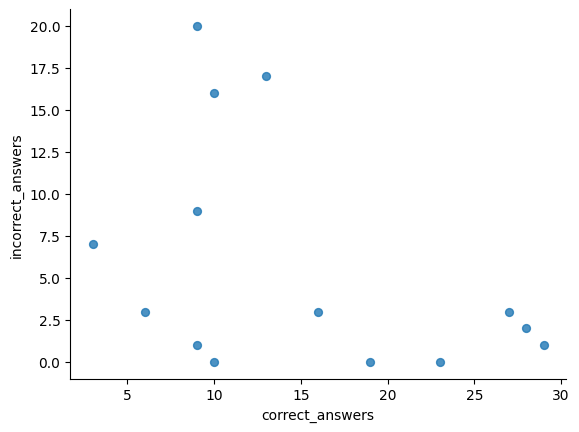

In [19]:
from matplotlib import pyplot as plt
filtered_df.plot(kind='scatter', x='correct_answers', y='incorrect_answers', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

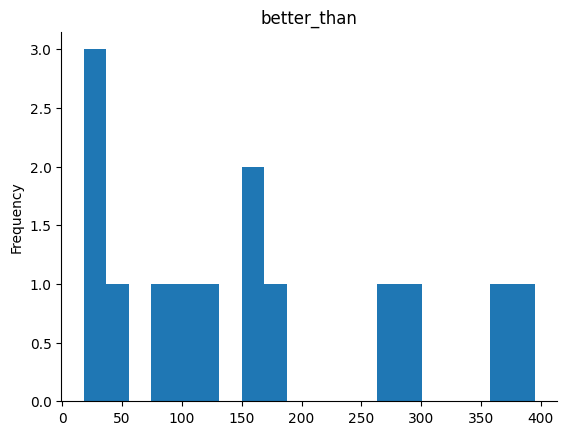

In [20]:
from matplotlib import pyplot as plt
filtered_df['better_than'].plot(kind='hist', bins=20, title='better_than')
plt.gca().spines[['top', 'right',]].set_visible(False)

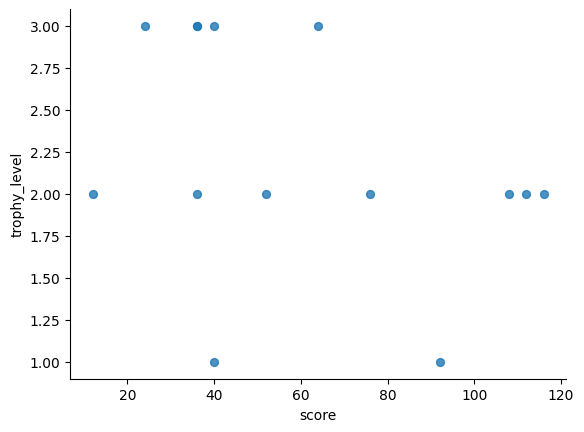

In [21]:
from matplotlib import pyplot as plt
filtered_df.plot(kind='scatter', x='score', y='trophy_level', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

In [22]:
filtered_df.columns

Index(['score', 'accuracy', 'final_score', 'negative_score', 'correct_answers',
       'incorrect_answers', 'better_than', 'quiz_id', 'quiz.title',
       'quiz.topic', 'quiz.questions_count', 'quiz.correct_answer_marks',
       'quiz.negative_marks', 'trophy_level', 'speed', 'duration',
       'mistakes_corrected', 'initial_mistake_count'],
      dtype='object')

In [24]:
filtered_df.dtypes


,0
score,int64
accuracy,object
final_score,object
negative_score,object
correct_answers,int64
incorrect_answers,int64
better_than,int64
quiz_id,int64
quiz.title,object
quiz.topic,object


In [26]:
final_dataset

,score,accuracy,final_score,negative_score,correct_answers,incorrect_answers,better_than,quiz_id,quiz.title,quiz.topic,quiz.questions_count,quiz.correct_answer_marks,quiz.negative_marks,trophy_level,speed,duration,mistakes_corrected,initial_mistake_count
0,108,90.000000,105.0,3.0,27,3,107,51,Human Physiology (15),Body Fluids and Circulation,100,4.0,1.0,2,100,15:00,9,12
1,92,100.000000,92.0,0.0,23,0,395,6,Human Physiology PYQ,Body Fluids and Circulation,23,4.0,1.0,1,100,15:00,3,3
2,116,96.000000,115.0,1.0,29,1,115,51,Human Physiology (15),Body Fluids and Circulation,100,4.0,1.0,2,100,15:00,11,12
3,36,90.000000,35.0,1.0,9,1,152,6,Human Physiology PYQ,Body Fluids and Circulation,23,4.0,1.0,2,100,15:00,1,2
4,36,31.000000,16.0,20.0,9,20,35,51,Human Physiology (15),Body Fluids and Circulation,100,4.0,1.0,3,96,15:00,0,20
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
79,26,67.859757,25.477534,2.59377,8,2,23,50,Human Physiology (14) (Augmented),Respiration and Gas Exchange,99,4.0,1.0,3,90,15:00,0,3
80,14,66.077837,11.447901,2.262981,3,1,23,50,Human Physiology (14) (Augmented),Respiration and Gas Exchange,98,4.0,1.0,3,90,15:00,0,3
81,27,67.759516,22.708579,2.796143,8,2,23,50,Human Physiology (14) (Augmented),Respiration and Gas Exchange,105,4.0,1.0,3,90,15:00,0,3
82,32,69.755141,31.319867,2.759199,7,5,23,50,Human Physiology (14) (Augmented),Respiration and Gas Exchange,104,4.0,1.0,3,90,15:00,0,3


Average Performance by Topic:
                                           accuracy_numeric       score
quiz.topic                                                            
Body Fluids and Circulation                      72.333333   86.666667
Body Fluids and Circulation                      80.000000   54.666667
Human Reproduction                               38.000000   40.000000
Reproductive Health                              43.000000   52.000000
Respiration and Gas Exchange                     66.000000   24.000000
human health and disease                         93.000000  112.000000
microbes in human welfare                       100.000000   76.000000
principles of inheritance and variation          30.000000   12.000000
reproductive health                              92.000000   52.000000

Weak Topics:
                                           accuracy_numeric      score
quiz.topic                                                           
Body Fluids and Circulation      

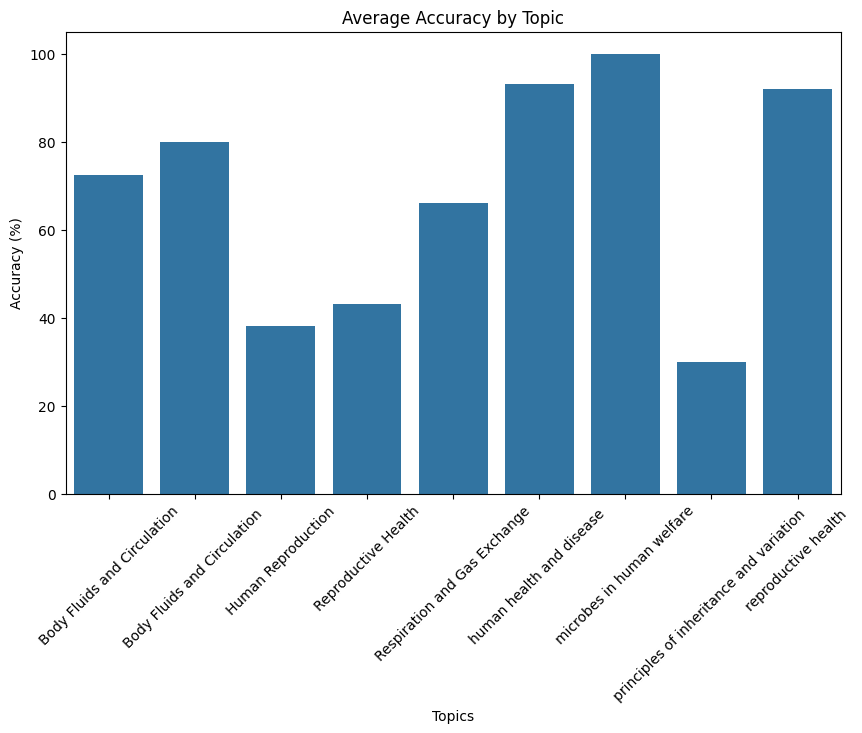

In [29]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load dataset
data = filtered_df.copy()

# Check if 'accuracy' is already numeric, if not convert
if not pd.api.types.is_numeric_dtype(data["accuracy"]):
    data["accuracy_numeric"] = data["accuracy"].str.rstrip(" %").astype(float)
else:
    data["accuracy_numeric"] = data["accuracy"]  # If already numeric, keep it

# Analyze Performance by Topic
topic_performance = data.groupby("quiz.topic")[["accuracy_numeric", "score"]].mean()
print("Average Performance by Topic:\n", topic_performance)

# Identify Weak Topics
weak_topics = topic_performance[topic_performance["accuracy_numeric"] < 85]
print("\nWeak Topics:\n", weak_topics)

# Analyze Performance Trends by Difficulty Level
difficulty_performance = data.groupby("trophy_level")[["accuracy_numeric", "score"]].mean()
print("\nPerformance by Difficulty Level:\n", difficulty_performance)

# Visualization of Accuracy by Topic
plt.figure(figsize=(10, 6))
sns.barplot(x=topic_performance.index, y=topic_performance["accuracy_numeric"])
plt.title("Average Accuracy by Topic")
plt.xlabel("Topics")
plt.ylabel("Accuracy (%)")
plt.xticks(rotation=45)
plt.show()

In [51]:
# Time Efficiency Analysis
data["efficiency"] = data["score"] / data["duration"].str.split(":").apply(lambda x: int(x[0]) * 60 + int(x[1]))
print("\nTop Performers by Efficiency:\n", data[["quiz.title", "efficiency"]])




Top Performers by Efficiency:
                                      quiz.title  efficiency
0                         Human Physiology (15)    0.120000
1                          Human Physiology PYQ    0.102222
2                         Human Physiology (15)    0.128889
3                          Human Physiology PYQ    0.040000
4                         Human Physiology (15)    0.040000
5                                  Reproduction    0.044444
6                          Human Physiology PYQ    0.040000
7   PRINCIPLES OF INHERITANCE AND VARIATION PYQ    0.013333
8                MICROBES IN HUMAN WELFARE  PYQ    0.084444
9                       REPRODUCTIVE HEALTH PYQ    0.044444
10                 HUMAN HEALTH AND DISEASE PYQ    0.124444
11                      REPRODUCTIVE HEALTH PYQ    0.071111
12                                 Reproduction    0.057778
13                        Human Physiology (14)    0.026667


In [50]:
# Mistakes Corrected Analysis
data["improvement_rate"] = data["mistakes_corrected"] / data["initial_mistake_count"]
print("\nImprovement Trends:\n", data[["quiz.title", "improvement_rate"]])



Improvement Trends:
                                      quiz.title  improvement_rate
0                         Human Physiology (15)          0.750000
1                          Human Physiology PYQ          1.000000
2                         Human Physiology (15)          0.916667
3                          Human Physiology PYQ          0.500000
4                         Human Physiology (15)          0.000000
5                                  Reproduction          0.000000
6                          Human Physiology PYQ          0.000000
7   PRINCIPLES OF INHERITANCE AND VARIATION PYQ          0.000000
8                MICROBES IN HUMAN WELFARE  PYQ          1.000000
9                       REPRODUCTIVE HEALTH PYQ               NaN
10                 HUMAN HEALTH AND DISEASE PYQ          0.857143
11                      REPRODUCTIVE HEALTH PYQ          0.000000
12                                 Reproduction          0.000000
13                        Human Physiology (14)       

In [58]:
data["improvement_rate"].fillna(0, inplace=True)


<ipython-input-58-d5b58b9e9e5a>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data["improvement_rate"].fillna(0, inplace=True)


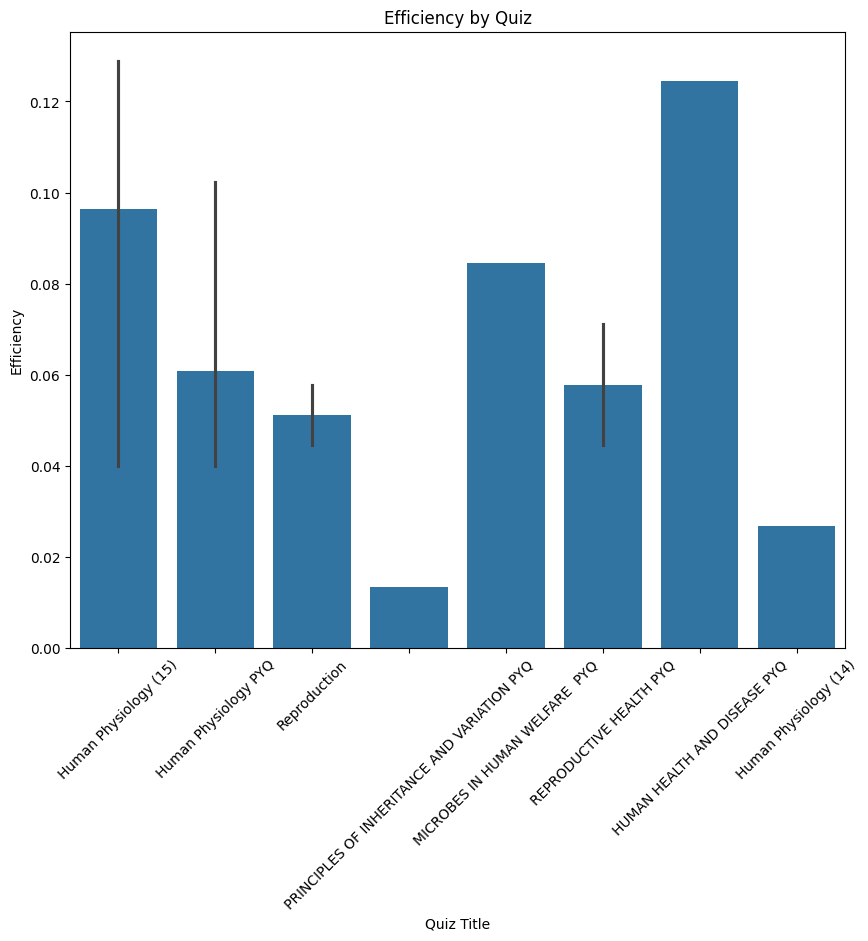

In [61]:
import matplotlib.pyplot as plt
import seaborn as sns

# Efficiency Distribution
plt.figure(figsize=(10, 8))
sns.barplot(x="quiz.title", y="efficiency", data=data)
plt.title("Efficiency by Quiz")
plt.xlabel("Quiz Title")
plt.ylabel("Efficiency")
plt.xticks(rotation=45)
plt.show()



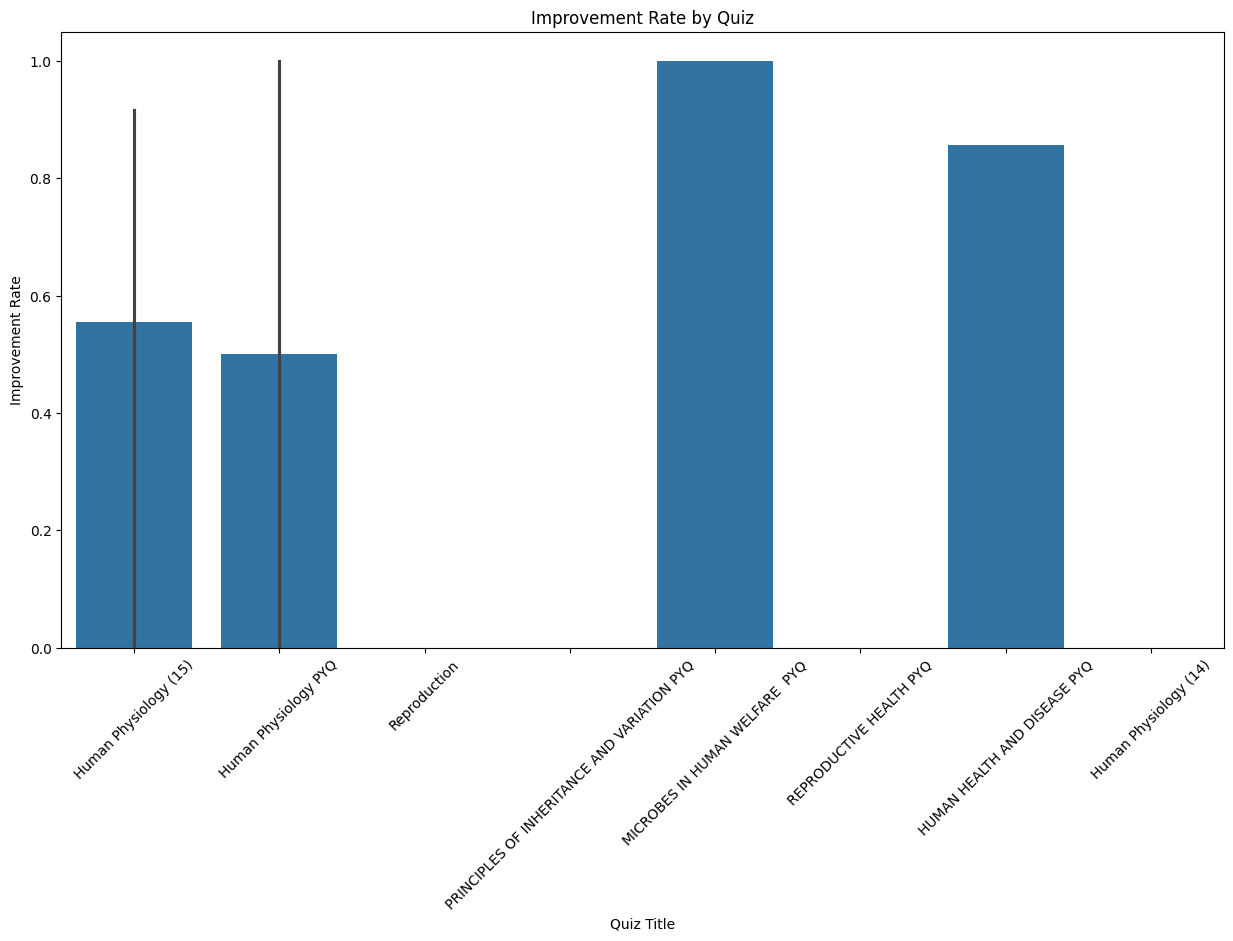

In [63]:
# Improvement Rate Distribution
plt.figure(figsize=(15, 8))
sns.barplot(x="quiz.title", y="improvement_rate", data=data)
plt.title("Improvement Rate by Quiz")
plt.xlabel("Quiz Title")
plt.ylabel("Improvement Rate")
plt.xticks(rotation=45)
plt.show()


In [32]:
data

,score,accuracy,final_score,negative_score,correct_answers,incorrect_answers,better_than,quiz_id,quiz.title,quiz.topic,...,quiz.correct_answer_marks,quiz.negative_marks,trophy_level,speed,duration,mistakes_corrected,initial_mistake_count,accuracy_numeric,efficiency,improvement_rate
0,108,90,105.0,3.0,27,3,107,51,Human Physiology (15),Body Fluids and Circulation,...,4.0,1.0,2,100,15:00,9,12,90,0.120000,0.750000
1,92,100,92.0,0.0,23,0,395,6,Human Physiology PYQ,Body Fluids and Circulation,...,4.0,1.0,1,100,15:00,3,3,100,0.102222,1.000000
2,116,96,115.0,1.0,29,1,115,51,Human Physiology (15),Body Fluids and Circulation,...,4.0,1.0,2,100,15:00,11,12,96,0.128889,0.916667
3,36,90,35.0,1.0,9,1,152,6,Human Physiology PYQ,Body Fluids and Circulation,...,4.0,1.0,2,100,15:00,1,2,90,0.040000,0.500000
4,36,31,16.0,20.0,9,20,35,51,Human Physiology (15),Body Fluids and Circulation,...,4.0,1.0,3,96,15:00,0,20,31,0.040000,0.000000
5,40,38,24.0,16.0,10,16,43,57,Reproduction,Human Reproduction,...,4.0,1.0,3,86,15:00,0,16,38,0.044444,0.000000
6,36,50,27.0,9.0,9,9,152,6,Human Physiology PYQ,Body Fluids and Circulation,...,4.0,1.0,3,78,15:00,0,9,50,0.040000,0.000000
7,12,30,5.0,7.0,3,7,18,20,PRINCIPLES OF INHERITANCE AND VARIATION PYQ,principles of inheritance and variation,...,4.0,1.0,2,100,15:00,0,7,30,0.013333,0.000000
8,76,100,76.0,0.0,19,0,375,24,MICROBES IN HUMAN WELFARE PYQ,microbes in human welfare,...,4.0,1.0,2,95,15:00,4,4,100,0.084444,1.000000
9,40,100,40.0,0.0,10,0,177,18,REPRODUCTIVE HEALTH PYQ,reproductive health,...,4.0,1.0,1,100,15:00,0,0,100,0.044444,NaN


In [33]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler


clustering_features = data[["accuracy_numeric", "trophy_level", "mistakes_corrected", "efficiency"]]
scaler = StandardScaler()
clustering_features_scaled = scaler.fit_transform(clustering_features)


kmeans = KMeans(n_clusters=4, random_state=42)
data["persona"] = kmeans.fit_predict(clustering_features_scaled)


persona_summary = data.groupby("persona")[["accuracy_numeric", "trophy_level", "efficiency"]].mean()
print("\nPersona Summary:\n", persona_summary)



Persona Summary:
          accuracy_numeric  trophy_level  efficiency
persona                                            
0               48.857143      2.714286    0.041905
1               96.666667      1.666667    0.075556
2               93.000000      2.000000    0.124444
3              100.000000      1.000000    0.044444


In [34]:
# Check schema
print("Schema of the dataset:")
print(filtered_df.info())


In [68]:
# General statistics
print("\nDescriptive Statistics:")
filtered_df.describe()



Descriptive Statistics:


,score,accuracy,correct_answers,incorrect_answers,better_than,quiz_id,quiz.questions_count,trophy_level,mistakes_corrected,initial_mistake_count,duration_seconds,accuracy_numeric
count,14.000000,14.000000,14.000000,14.000000,14.000000,14.000000,14.00000,14.000000,14.000000,14.000000,14.0,14.000000
mean,60.285714,72.214286,15.071429,5.857143,160.000000,31.500000,55.50000,2.214286,2.857143,8.714286,900.0,72.214286
std,34.675260,27.904173,8.668815,6.948792,126.353594,20.346045,35.01593,0.699293,4.452435,6.462062,0.0,27.904173
min,12.000000,30.000000,3.000000,0.000000,18.000000,6.000000,20.00000,1.000000,0.000000,0.000000,900.0,30.000000
25%,36.000000,44.750000,9.000000,1.000000,55.250000,18.000000,23.00000,2.000000,0.000000,3.000000,900.0,44.750000
50%,46.000000,87.000000,11.500000,3.000000,133.500000,24.500000,48.00000,2.000000,0.000000,8.000000,900.0,87.000000
75%,88.000000,95.250000,22.000000,8.500000,246.750000,51.000000,97.25000,3.000000,3.750000,13.500000,900.0,95.250000
max,116.000000,100.000000,29.000000,20.000000,395.000000,58.000000,100.00000,3.000000,12.000000,20.000000,900.0,100.000000


In [76]:


# Group by quiz topics
topic_performance = filtered_df.groupby("quiz.topic").agg({
    "accuracy_numeric": "mean",
    "trophy_level": "mean",
    "score": "mean"
}).reset_index()

print("\nAverage performance by topic:")
topic_performance




Average performance by topic:


,quiz.topic,accuracy_numeric,trophy_level,score
0,Body Fluids and Circulation,72.333333,2.333333,86.666667
1,Body Fluids and Circulation,80.000000,2.000000,54.666667
2,Human Reproduction,38.000000,3.000000,40.000000
3,Reproductive Health,43.000000,2.000000,52.000000
4,Respiration and Gas Exchange,66.000000,3.000000,24.000000
5,human health and disease,93.000000,2.000000,112.000000
6,microbes in human welfare,100.000000,2.000000,76.000000
7,principles of inheritance and variation,30.000000,2.000000,12.000000
8,reproductive health,92.000000,2.000000,52.000000


In [77]:
# Group by trophy levels

filtered_df['duration_seconds'] = filtered_df['duration'].str.split(':').apply(lambda x: int(x[0]) * 60 + int(x[1]))
difficulty_performance = filtered_df.groupby("trophy_level").agg({
    "accuracy_numeric": "mean",
    "score": "mean",
    "duration_seconds": "mean"
}).reset_index()
print("\nPerformance by difficulty level (trophy_level):")
difficulty_performance




Performance by difficulty level (trophy_level):


<ipython-input-77-10cd45fb9a4b>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df['duration_seconds'] = filtered_df['duration'].str.split(':').apply(lambda x: int(x[0]) * 60 + int(x[1]))


,trophy_level,accuracy_numeric,score,duration_seconds
0,1,100.000000,66.000000,900.0
1,2,77.428571,73.142857,900.0
2,3,53.800000,40.000000,900.0


<ipython-input-44-f35e3d8abefe>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df["duration_seconds"] = filtered_df["duration"].str.split(":").apply(lambda x: int(x[0]) * 60 + int(x[1]))
<ipython-input-44-f35e3d8abefe>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df["accuracy_numeric"] = filtered_df["accuracy"]


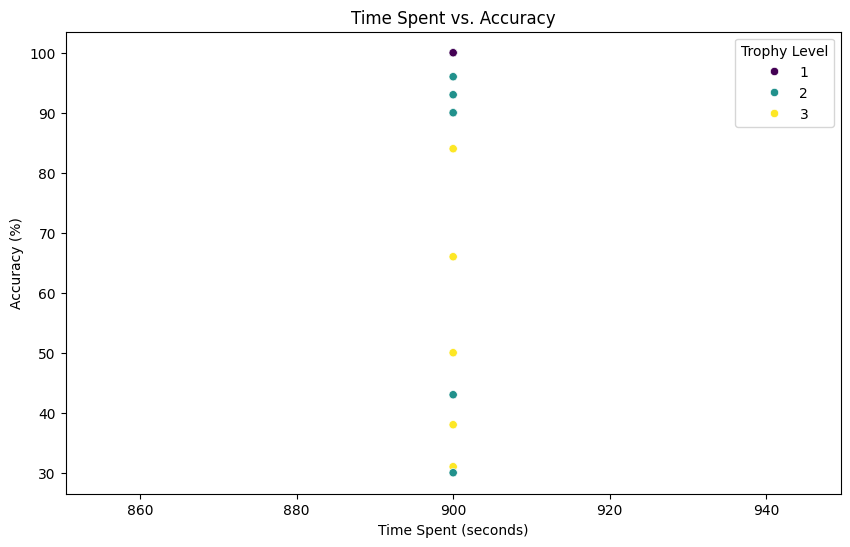

In [44]:
import matplotlib.pyplot as plt
import seaborn as sns


filtered_df["duration_seconds"] = filtered_df["duration"].str.split(":").apply(lambda x: int(x[0]) * 60 + int(x[1]))


if not pd.api.types.is_numeric_dtype(filtered_df["accuracy"]):
    filtered_df["accuracy_numeric"] = filtered_df["accuracy"].str.rstrip(" %").astype(float)
else:
    filtered_df["accuracy_numeric"] = filtered_df["accuracy"]


plt.figure(figsize=(10, 6))
sns.scatterplot(x="duration_seconds", y="accuracy_numeric", hue="trophy_level", data=filtered_df, palette="viridis")
plt.title("Time Spent vs. Accuracy")
plt.xlabel("Time Spent (seconds)")
plt.ylabel("Accuracy (%)")
plt.legend(title="Trophy Level")
plt.show()


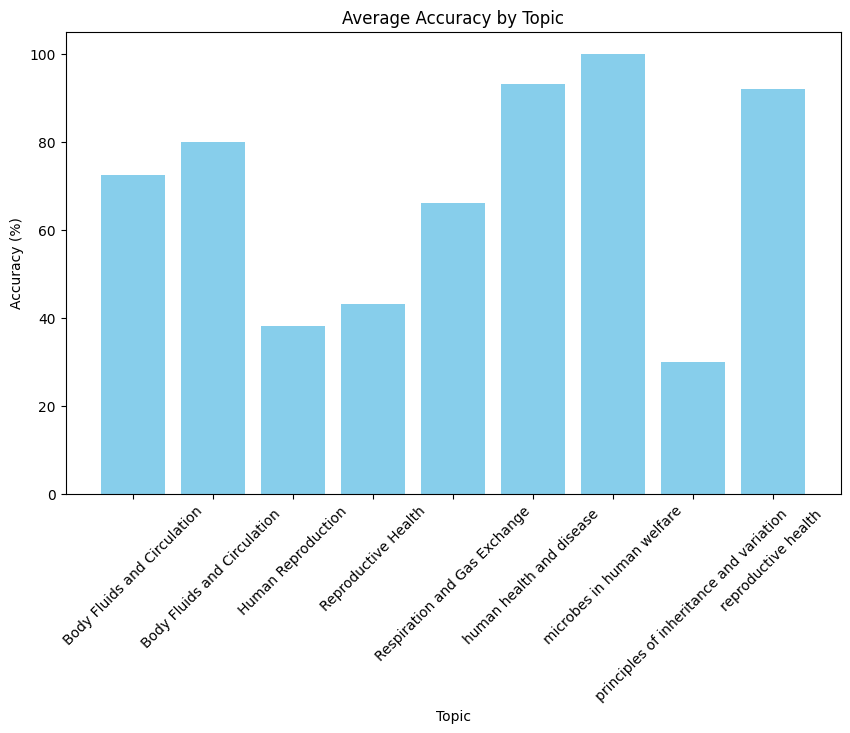

In [73]:
# Visualization: Performance by Topic
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.bar(topic_performance["quiz.topic"], topic_performance["accuracy_numeric"], color="skyblue")
plt.title("Average Accuracy by Topic")
plt.xlabel("Topic")
plt.ylabel("Accuracy (%)")
plt.xticks(rotation=45)
plt.show()



Weak Topics (Accuracy < 85%): ['Body Fluids and Circulation', 'Body Fluids and Circulation ', 'Human Reproduction', 'Reproductive Health', 'Respiration and Gas Exchange', 'principles of inheritance and variation ']


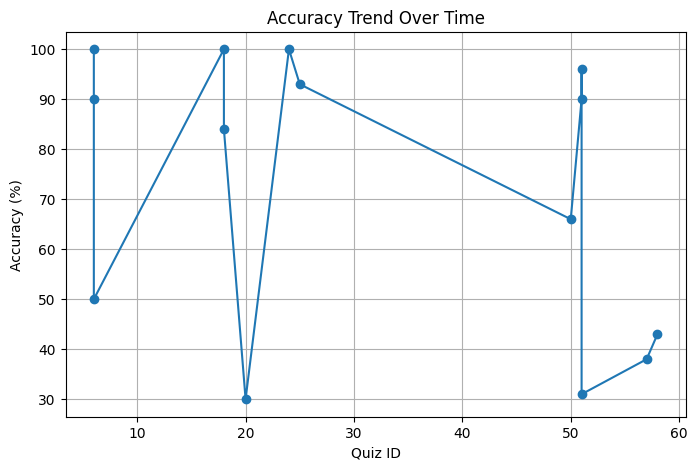


Performance by Trophy Levels (difficulty):
   trophy_level  accuracy_numeric      score  duration_seconds
0             1        100.000000  66.000000             900.0
1             2         77.428571  73.142857             900.0
2             3         53.800000  40.000000             900.0


In [36]:
# Identify weak areas (topics with accuracy < 85%)
weak_topics = topic_performance[topic_performance["accuracy_numeric"] < 85]["quiz.topic"].tolist()
print("\nWeak Topics (Accuracy < 85%):", weak_topics)

# Identify performance trends
accuracy_trend = filtered_df.sort_values("quiz_id")[["quiz_id", "accuracy_numeric"]]

plt.figure(figsize=(8, 5))
plt.plot(accuracy_trend["quiz_id"], accuracy_trend["accuracy_numeric"], marker="o")
plt.title("Accuracy Trend Over Time")
plt.xlabel("Quiz ID")
plt.ylabel("Accuracy (%)")
plt.grid(True)
plt.show()

# Performance gaps by difficulty
print("\nPerformance by Trophy Levels (difficulty):")
print(difficulty_performance)


In [70]:
weak_topics

['Body Fluids and Circulation',
 'Body Fluids and Circulation ',
 'Human Reproduction',
 'Reproductive Health',
 'Respiration and Gas Exchange',
 'principles of inheritance and variation ']

In [37]:
# Generate Recommendations
recommendations = []

# Weak topics
for topic in weak_topics:
    recommendations.append(f"Focus on the topic '{topic}' by reviewing concepts and solving additional practice questions.")

# Difficulty-based recommendations
for _, row in difficulty_performance.iterrows():
    if row["accuracy_numeric"] < 85:
        recommendations.append(f"Spend more time practicing quizzes with Trophy Level {int(row['trophy_level'])} to improve accuracy.")


# Convert 'duration' to seconds before calculating the mean
filtered_df["duration_seconds"] = filtered_df["duration"].str.split(":").apply(lambda x: int(x[0]) * 60 + int(x[1]))
avg_time_per_question = filtered_df["duration_seconds"].mean() / filtered_df["quiz.questions_count"].mean()
if avg_time_per_question > 60:  # Assuming > 60 seconds per question is inefficient
    recommendations.append("Work on improving speed by solving questions under timed conditions.")
print("\nRecommendations:")
for rec in recommendations:
    print("- " + rec)



Recommendations:
- Focus on the topic 'Body Fluids and Circulation' by reviewing concepts and solving additional practice questions.
- Focus on the topic 'Body Fluids and Circulation ' by reviewing concepts and solving additional practice questions.
- Focus on the topic 'Human Reproduction' by reviewing concepts and solving additional practice questions.
- Focus on the topic 'Reproductive Health' by reviewing concepts and solving additional practice questions.
- Focus on the topic 'Respiration and Gas Exchange' by reviewing concepts and solving additional practice questions.
- Focus on the topic 'principles of inheritance and variation ' by reviewing concepts and solving additional practice questions.
- Spend more time practicing quizzes with Trophy Level 2 to improve accuracy.
- Spend more time practicing quizzes with Trophy Level 3 to improve accuracy.


<ipython-input-37-20a240610739>:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df["duration_seconds"] = filtered_df["duration"].str.split(":").apply(lambda x: int(x[0]) * 60 + int(x[1]))


In [38]:

persona = {}


high_accuracy_topics = topic_performance[topic_performance["accuracy_numeric"] >= 90]["quiz.topic"].tolist()
persona["Strengths"] = high_accuracy_topics


persona["Weaknesses"] = weak_topics


persona["Efficiency"] = "Efficient" if avg_time_per_question <= 60 else "Needs improvement"


trophy_levels = difficulty_performance.sort_values("trophy_level", ascending=False)
persona["Comfortable with High Difficulty"] = "Yes" if trophy_levels.iloc[0]["accuracy_numeric"] >= 85 else "No"


print("\nStudent Persona Summary:")
for key, value in persona.items():
    print(f"{key}: {value}")


print("\nInsights:")
print(f"- The user excels in topics like {', '.join(high_accuracy_topics)}.")
print(f"- Weaknesses are found in topics like {', '.join(weak_topics)}.")
print(f"- Efficiency during quizzes is '{persona['Efficiency']}'.")
print(f"- Comfortable with higher difficulty levels: {persona['Comfortable with High Difficulty']}")



Student Persona Summary:
Strengths: ['human health and disease ', 'microbes in human welfare', 'reproductive health ']
Weaknesses: ['Body Fluids and Circulation', 'Body Fluids and Circulation ', 'Human Reproduction', 'Reproductive Health', 'Respiration and Gas Exchange', 'principles of inheritance and variation ']
Efficiency: Efficient
Comfortable with High Difficulty: No

Insights:
- The user excels in topics like human health and disease , microbes in human welfare, reproductive health .
- Weaknesses are found in topics like Body Fluids and Circulation, Body Fluids and Circulation , Human Reproduction, Reproductive Health, Respiration and Gas Exchange, principles of inheritance and variation .
- Efficiency during quizzes is 'Efficient'.
- Comfortable with higher difficulty levels: No


In [39]:
avg_time_per_question

16.216216216216218

Average Response Time per Question for Each Quiz (based on questions attempted):
                                 quiz.topic  avg_response_time
0               Body Fluids and Circulation          30.344828
1              Body Fluids and Circulation           59.710145
2                        Human Reproduction          34.615385
3                       Reproductive Health          30.000000
4              Respiration and Gas Exchange         100.000000
5                 human health and disease           30.000000
6                 microbes in human welfare          47.368421
7  principles of inheritance and variation           90.000000
8                      reproductive health           68.684211


<ipython-input-40-6ca5a22a1e2d>:23: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=quiz_avg_time["quiz.topic"], y=quiz_avg_time["avg_response_time"], palette="muted")


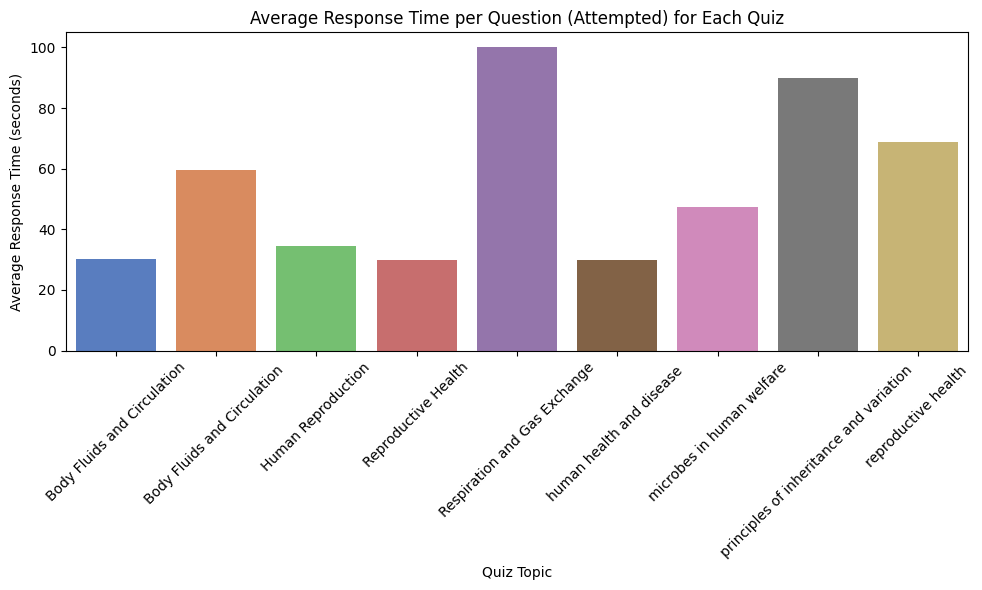

In [40]:

data['duration_seconds'] = data['duration'].str.split(":").apply(lambda x: int(x[0]) * 60 + int(x[1]))


data['questions_attempted'] = data['correct_answers'] + data['incorrect_answers']

data['avg_response_time'] = data['duration_seconds'] / data['questions_attempted']


quiz_avg_time = data.groupby("quiz.topic")["avg_response_time"].mean().reset_index()
quiz_avg_time.columns = ["quiz.topic", "avg_response_time"]


print("Average Response Time per Question for Each Quiz (based on questions attempted):")
print(quiz_avg_time)


import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.barplot(x=quiz_avg_time["quiz.topic"], y=quiz_avg_time["avg_response_time"], palette="muted")
plt.title("Average Response Time per Question (Attempted) for Each Quiz")
plt.xlabel("Quiz Topic")
plt.ylabel("Average Response Time (seconds)")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


Average Response Time per Question for Each Trophy Level:
   trophy_level  avg_response_time
0             1          52.006728
1             2          51.240006
2             3          60.929049


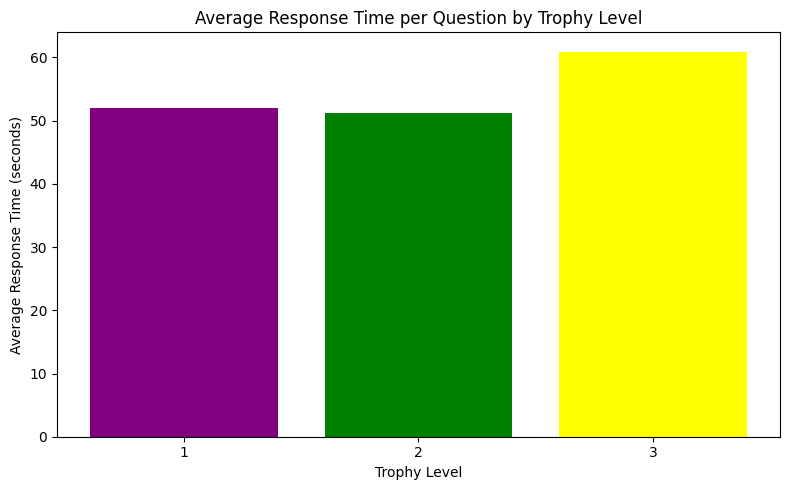

In [78]:
import pandas as pd
import matplotlib.pyplot as plt

# Convert duration to total seconds (if not already done)
data['duration_seconds'] = data['duration'].str.split(":").apply(lambda x: int(x[0]) * 60 + int(x[1]))

# Calculate the number of questions attended (correct + incorrect)
data['questions_attempted'] = data['correct_answers'] + data['incorrect_answers']

# Calculate average response time per question
data['avg_response_time'] = data['duration_seconds'] / data['questions_attempted']

# Group by trophy level and calculate the mean average response time
trophy_avg_time = data.groupby('trophy_level')['avg_response_time'].mean().reset_index()

# Display results
print("Average Response Time per Question for Each Trophy Level:")
print(trophy_avg_time)

# Visualization
plt.figure(figsize=(8, 5))
plt.bar(trophy_avg_time['trophy_level'], trophy_avg_time['avg_response_time'], color=['purple', 'green', 'yellow'])
plt.title("Average Response Time per Question by Trophy Level")
plt.xlabel("Trophy Level")
plt.ylabel("Average Response Time (seconds)")
plt.xticks(trophy_avg_time['trophy_level'])
plt.tight_layout()
plt.show()


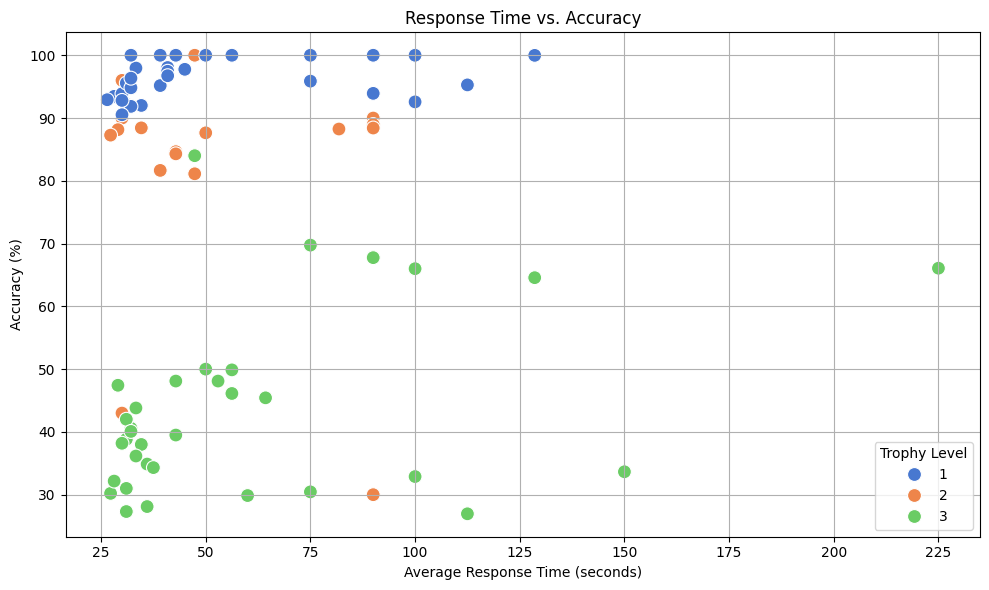

In [80]:
import seaborn as sns
import matplotlib.pyplot as plt


if data['accuracy'].dtype == object:
    data['accuracy_numeric'] = data['accuracy'].str.replace('%', '', regex=False).astype(float)
else:
    data['accuracy_numeric'] = data['accuracy']


plt.figure(figsize=(10, 6))
sns.scatterplot(
    x=data['avg_response_time'],
    y=data['accuracy_numeric'],
    hue=data['trophy_level'],
    palette="muted",
    s=100
)
plt.title("Response Time vs. Accuracy")
plt.xlabel("Average Response Time (seconds)")
plt.ylabel("Accuracy (%)")
plt.legend(title="Trophy Level", loc='lower right')
plt.grid(True)
plt.tight_layout()
plt.show()